In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import cv2 as cv
import os
from sklearn.metrics import mean_squared_error

In [30]:
Image_loc = 'E:\A10-11\A11\imagesA11'
Images = os.listdir(Image_loc)
Images_locs = [os.path.join(Image_loc,I) for I in Images] 
print(f'{len(Images_locs)} files found in {Image_loc}')

3 files found in E:\A10-11\A11\imagesA11


In [31]:
def Scaler1(image_original,high_pass):
    scaled_hp_image = np.zeros(image_original.shape)
    sharpened_image = np.zeros(image_original.shape)
    rows,cols,color = high_pass.shape
    min = image_original.min()
    max = image_original.max()
    k = 0.005
    t = 0.9
    for c in range(color):
        for i in range(rows):
            for j in range(cols):
                if high_pass[i,j,c] < t*max:
                    scaling_fac = k * (max-high_pass[i,j,c])
                else:
                    scaling_fac = k*(max-t*max)

                scaled_hp_image[i,j,c] = scaling_fac*high_pass[i,j,c]
                sharpened_image[i,j,c] = image_original[i,j,c] +scaled_hp_image[i,j,c]

    x = np.arange(0,256)
    s = np.where(x < t*max, k*(x-min), k*(max-t*max))
    plt.plot(x,s)
    plt.xlabel('Pixel range')
    plt.ylabel('scaling factor')
    plt.title('Variation of k parameter')
    plt.show()
    return sharpened_image 



In [14]:
def Scaler2(image_original,high_pass):
    sharpened_image = cv.addWeighted(image_original, 1, high_pass, 2, 0)
    return sharpened_image



In [26]:
def Scaler3(image_original,high_pass):
    scaled_hp_image = np.empty(image_original.shape)
    sharpened_image = np.empty(image_original.shape)
    min = image_original.min()
    max = image_original.max()
    slope = 100
    midpoint = 0.5
    rows,cols,color = high_pass.shape
    for c in range(color):
        for i in range(rows):
            for j in range(cols):
                # Apply a sigmoidal curve to adjust k based on the pixel value
                x = high_pass[i, j, c] / max
                k = 1 / (1 + np.exp(-slope * (x - midpoint)))
                scaling_fac = k * 0.003

                scaled_hp_image[i,j,c] = scaling_fac*high_pass[i,j,c]
                sharpened_image[i,j,c] = image_original[i,j,c] + scaled_hp_image[i,j,c]
    
    x = np.arange(0,256)
    x_m = x/x.max()
    k = 10 / (1 + np.exp(-slope * (x_m - midpoint)))
    plt.plot(x,k)
    plt.xlabel('Pixel range')
    plt.ylabel('scaling factor')
    plt.title('Variation of k parameter')
    plt.show()
    return sharpened_image



In [ ]:
def Scaler4(image_original, high_pass):
    scaled_hp_image = np.empty(image_original.shape)
    sharpened_image = np.empty(image_original.shape)
    rows,cols,color = high_pass.shape
    min = image_original.min()
    max = image_original.max()
    k = 0.0005
    t = 0.7
    for c in range(color):
        for i in range(rows):
            for j in range(cols):
                if high_pass[i,j,c] < t*max:
                    scaling_fac = k * high_pass[i,j,c]
                else:
                    scaling_fac = -k * high_pass[i,j,c] + 2*k*t*max

                scaled_hp_image[i,j,c] = scaling_fac*high_pass[i,j,c]
                sharpened_image[i,j,c] = image_original[i,j,c] +scaled_hp_image[i,j,c]

    x = np.arange(0,256)
    s = np.where(x < t*max, k*x, (-k*x)+(2*k*t*max))
    plt.plot(x,s)
    plt.xlabel('Pixel range')
    plt.ylabel('scaling factor')
    plt.title('Variation of k parameter')
    plt.show()
    return sharpened_image

In [47]:
def Image_sharpener(Images_loc):
    image = cv.imread(Images_loc)
    image_original = np.asarray(image)
    min = image_original.min()
    max = image_original.max()
    print('Pixel Range =','(',min,max,')')
    kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    high_pass = cv.filter2D(image, -1, kernel)
    sharpened_image = Scaler2(image_original,high_pass)
    return image_original,sharpened_image               


Pixel Range = ( 0 255 )


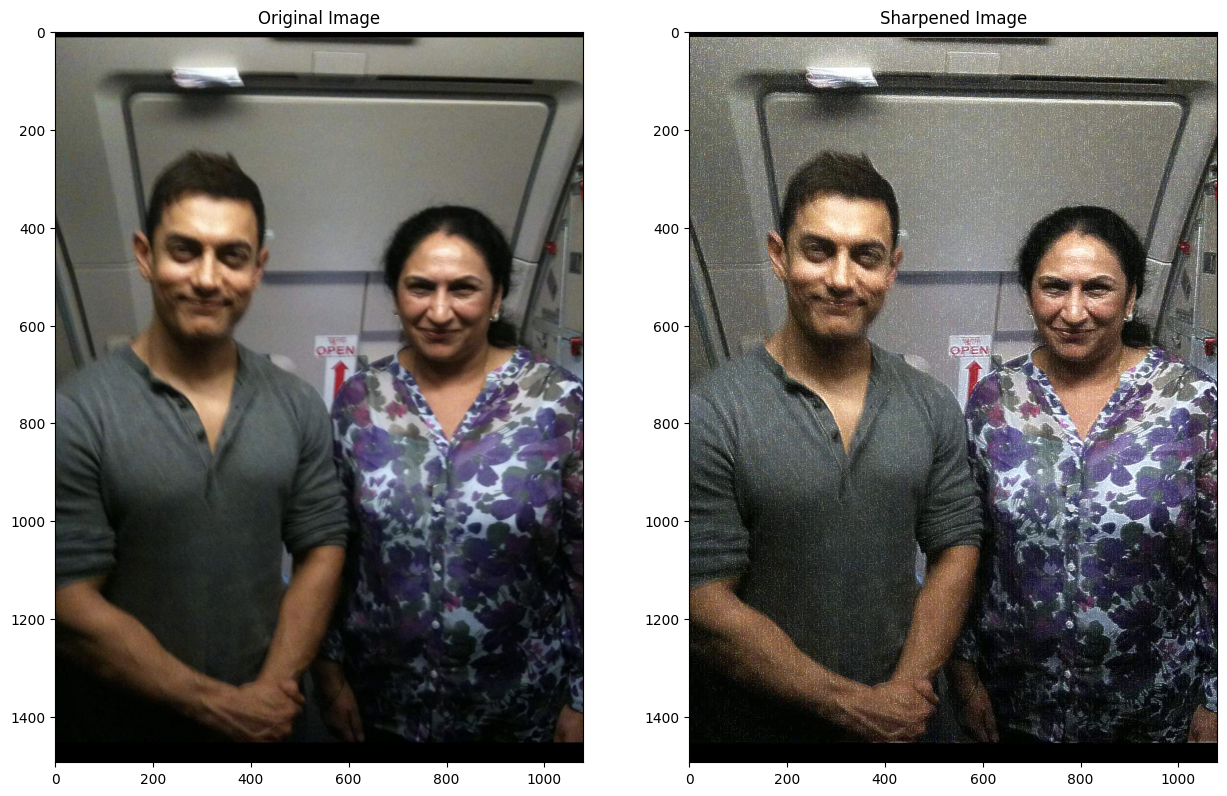

Pixel Range = ( 0 255 )


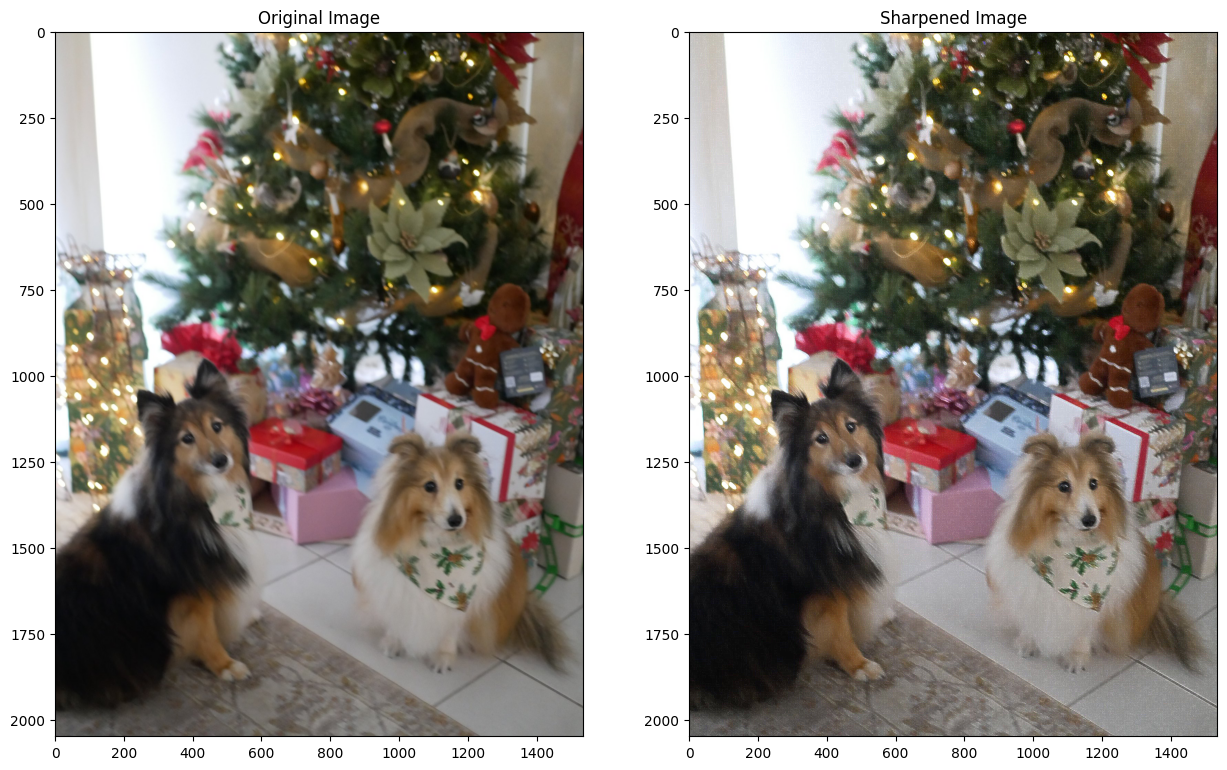

Pixel Range = ( 0 255 )


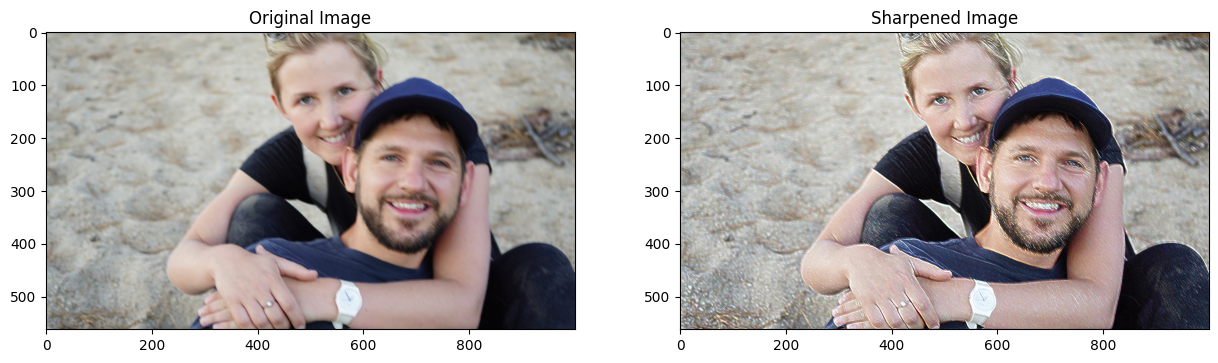

In [48]:
for i in Images_locs:
    Original_image,Sharpened_image = Image_sharpener(i)
    Original_image = cv.cvtColor(Original_image,cv.COLOR_BGR2RGB)
    Sharpened_image = cv.normalize(Sharpened_image, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
    Sharpened_image = cv.convertScaleAbs(Sharpened_image)
    Sharpened_image = cv.cvtColor(Sharpened_image,cv.COLOR_BGR2RGB)
    fig,axs = plt.subplots(1,2,figsize = (15,15))
    axs[0].imshow(Original_image)
    axs[0].set_title('Original Image')
    axs[1].imshow(Sharpened_image)
    axs[1].set_title('Sharpened Image')
    plt.show()
